# Análisis Descriptivo de la Gestión del negocio: Influenciadores clave

Un análisis descriptivo es un tipo de análisis que se utiliza para explorar y describir los datos, identificar patrones y tendencias y para generar estadísticas y visualizaciones que permitan entender los datos de manera más clara. En este caso, se utilizan las técnicas de correlación y pruebas estadísticas para identificar las variables que influyen en las ventas de la empresa ***AdventureWorks***.

Un análisis descriptivo no pretende hacer predicciones o recomendaciones, sino simplemente brindar una descripción más detallada de los datos y su relación entre ellos.

## Carga de las librerías de python necesarias

In [1]:
import pyodbc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

plt.rcParams['figure.figsize'] = [12, 8]

Las librerías de Python son conjuntos de código predefinido que se utilizan para realizar tareas específicas en el lenguaje de programación Python.
Las librerías se utilizan para diferentes propósitos, como manipulación de datos, análisis de datos, visualización de datos, aprendizaje automático, desarrollo web, entre otros. 

## Extracción de los datos desde SQL Server

In [2]:
conn_str = pyodbc.connect('Driver={SQL Server};' 'Server=T05W06;''Database=AdventureWorks2019;''Trusted_Connection=yes;')
 # cláusula  'select' especifica las columnas que se van a devolver en el conjunto de resultados.
input_query = '''select                
	 CONCAT_WS('-',YEAR(t1.OrderDate), MONTH(t1.OrderDate)) as 'fecha',       
	 sum(t1.TotalDue) as 'ventas',
	 sum(t2.OrderQty) as 'cantidad',
	 count(distinct t1.SalesOrderID) as 'transacciones',
	 sum(t1.TotalDue)/count(distinct t1.SalesOrderID) as 'monto_promedio',
	 sum(t2.OrderQty)/count(distinct t1.SalesOrderID) as 'cantidad_promedio',
	 count(distinct t2.ProductID) as 'variedad',
	 count(distinct t1.CustomerID) as 'clientes',
	 CASE 
		WHEN count(distinct t1.SalesPersonID)<1 THEN 1 ELSE count(distinct t1.SalesPersonID)
		end as 'vendedores'
from Sales.SalesOrderHeader as t1
	Inner join Sales.SalesOrderDetail as t2 on t1.SalesOrderID = t2.SalesOrderID
	group by YEAR(t1.OrderDate), MONTH(t1.OrderDate) 
	order by YEAR(t1.OrderDate), MONTH(t1.OrderDate)'''

sales_data = pd.read_sql(input_query, conn_str)

C:\Users\CursosTardes\AppData\Local\Temp\ipykernel_18084\1513880618.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  sales_data = pd.read_sql(input_query, conn_str)


### - Explicar linea por linea la query utilizada arriba

SELECT:

Esta cláusula especifica las columnas que se van a devolver en el conjunto de resultados.



CONCAT_WS combina el año (YEAR(t1.OrderDate)) y el mes (MONTH(t1.OrderDate)) de la fecha del pedido en una sola cadena, separada por un guion ('-'). El alias 'fecha' se usa para nombrar esta columna en el resultado.

SUM(t1.TotalDue) AS 'ventas':
Suma el total de las ventas (TotalDue) para cada período (año y mes). El alias 'ventas' se usa para nombrar esta columna.

SUM(t2.OrderQty) AS 'cantidad':
Suma la cantidad de productos pedidos (OrderQty) para cada período. El alias 'cantidad' se usa para nombrar esta columna.

COUNT(DISTINCT t1.SalesOrderID) AS 'transacciones':
Cuenta el número de transacciones únicas (SalesOrderID) para cada período. El alias 'transacciones' se usa para nombrar esta columna.

SUM(t1.TotalDue) / COUNT(DISTINCT t1.SalesOrderID) AS 'monto_promedio':
Calcula el monto promedio por transacción dividiendo el total de ventas por el número de transacciones. El alias 'monto_promedio' se usa para nombrar esta columna.

SUM(t2.OrderQty) / COUNT(DISTINCT t1.SalesOrderID) AS 'cantidad_promedio':
Calcula la cantidad promedio de productos por transacción dividiendo el total de productos por el número de transacciones. El alias 'cantidad_promedio' se usa para nombrar esta columna.

COUNT(DISTINCT t2.ProductID) AS 'variedad':
Cuenta el número de productos únicos (ProductID) vendidos en cada período. El alias 'variedad' se usa para nombrar esta columna.

COUNT(DISTINCT t1.CustomerID) AS 'clientes':
Cuenta el número de clientes únicos (CustomerID) en cada período. El alias 'clientes' se usa para nombrar esta columna.

CASE WHEN COUNT(DISTINCT t1.SalesPersonID) < 1 THEN 1 ELSE COUNT(DISTINCT t1.SalesPersonID) END AS 'vendedores':
Cuenta el número de vendedores únicos (SalesPersonID) en cada período. Si no hay vendedores (menos de 1), devuelve 1 en su lugar. El alias 'vendedores' se usa para nombrar esta columna.

FROM Sales.SalesOrderHeader AS t1:
Especifica la tabla SalesOrderHeader como t1 para referirse a ella en la consulta.

INNER JOIN Sales.SalesOrderDetail AS t2 ON t1.SalesOrderID = t2.SalesOrderID:
Realiza una unión interna con la tabla SalesOrderDetail (t2) usando SalesOrderID para unir las tablas.

GROUP BY YEAR(t1.OrderDate), MONTH(t1.OrderDate):
Agrupa los resultados por año y mes de la fecha del pedido.

ORDER BY YEAR(t1.OrderDate), MONTH(t1.OrderDate):
Ordena los resultados por año y mes de la fecha del pedido.

In [3]:
sales_data

,fecha,ventas,cantidad,transacciones,monto_promedio,cantidad_promedio,variedad,clientes,vendedores
0,2011-5,8.094970e+06,825,43,188255.1210,19,47,43,9
1,2011-6,5.070965e+05,141,141,3596.4288,1,21,141,1
2,2011-7,2.608142e+07,2209,231,112906.5844,9,51,231,10
3,2011-8,3.800996e+07,2904,250,152039.8384,11,59,250,10
4,2011-9,5.547916e+05,157,157,3533.7045,1,22,157,1
5,2011-10,8.573987e+07,5382,327,262201.4520,16,60,327,10
6,2011-11,8.153130e+05,230,230,3544.8391,1,23,230,1
7,2011-12,1.098031e+07,1040,228,48159.2465,4,51,228,9
8,2012-1,5.743832e+07,3967,336,170947.3956,11,51,336,10
9,2012-2,1.792551e+07,1442,219,81851.6572,6,58,219,10


### - Explicar tabla de arriba, por ejemplo: ¿Que significa cada columna?

ventas:

El total de ventas (en términos monetarios) para el período específico. Se calcula sumando el valor de TotalDue de todas las órdenes de venta dentro del período.

cantidad:

La cantidad total de productos vendidos en el período. Se calcula sumando OrderQty de todas las órdenes de venta.

transacciones:

El número total de transacciones (órdenes de venta únicas) realizadas en el período. Se cuenta el número de SalesOrderID únicos.

monto_promedio:

El monto promedio por transacción en el período. Se calcula dividiendo ventas por transacciones.

cantidad_promedio:

La cantidad promedio de productos por transacción en el período. Se calcula dividiendo cantidad por transacciones.

variedad:

El número de productos distintos vendidos en el período. Se cuenta el número de ProductID únicos.

clientes:

El número de clientes únicos que realizaron compras en el período. Se cuenta el número de CustomerID únicos.

vendedores:

El número de vendedores únicos que participaron en las transacciones del período. Se cuenta el número de SalesPersonID únicos. Si no hay vendedores (menos de 1), se asigna un valor de 1.

### - Aproximar a dos decimales el monto_promedio

In [4]:
import pyodbc
import pandas as pd

# Definir los parámetros de conexión
conn_str = pyodbc.connect('Driver={SQL Server};' 'Server=T05W06;' 'Database=AdventureWorks2019;' 'Trusted_Connection=yes;')

# Definir la consulta SQL modificada
input_query = '''
SELECT
    CONCAT_WS('-', YEAR(t1.OrderDate), MONTH(t1.OrderDate)) AS 'fecha',
    SUM(t1.TotalDue) AS 'ventas',
    SUM(t2.OrderQty) AS 'cantidad',
    COUNT(DISTINCT t1.SalesOrderID) AS 'transacciones',
    ROUND(SUM(t1.TotalDue) / COUNT(DISTINCT t1.SalesOrderID), 2) AS 'monto_promedio',
    SUM(t2.OrderQty) / COUNT(DISTINCT t1.SalesOrderID) AS 'cantidad_promedio',
    COUNT(DISTINCT t2.ProductID) AS 'variedad',
    COUNT(DISTINCT t1.CustomerID) AS 'clientes',
    CASE 
        WHEN COUNT(DISTINCT t1.SalesPersonID) < 1 THEN 1 ELSE COUNT(DISTINCT t1.SalesPersonID)
    END AS 'vendedores'
FROM Sales.SalesOrderHeader AS t1
INNER JOIN Sales.SalesOrderDetail AS t2 ON t1.SalesOrderID = t2.SalesOrderID
GROUP BY YEAR(t1.OrderDate), MONTH(t1.OrderDate)
ORDER BY YEAR(t1.OrderDate), MONTH(t1.OrderDate)
'''

# Ejecutar la consulta y cargar los datos en un DataFrame
sales_data = pd.read_sql(input_query, conn_str)

# Mostrar las primeras filas del DataFrame
print(sales_data.head())


C:\Users\CursosTardes\AppData\Local\Temp\ipykernel_18084\4073068343.py:28: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  sales_data = pd.read_sql(input_query, conn_str)


    fecha        ventas  cantidad  transacciones  monto_promedio  \
0  2011-5  8.094970e+06       825             43       188255.12   
1  2011-6  5.070965e+05       141            141         3596.43   
2  2011-7  2.608142e+07      2209            231       112906.58   
3  2011-8  3.800996e+07      2904            250       152039.84   
4  2011-9  5.547916e+05       157            157         3533.70   

   cantidad_promedio  variedad  clientes  vendedores  
0                 19        47        43           9  
1                  1        21       141           1  
2                  9        51       231          10  
3                 11        59       250          10  
4                  1        22       157           1  


### - Efectuar la misma conexión a la base de datos usando SQLAlchemy, usar también la misma query.

In [2]:
from sqlalchemy import create_engine
import pandas as pd

# Crear la conexión usando SQLAlchemy
connection_string = "mssql+pyodbc://T05W06/AdventureWorks2019?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes"
engine = create_engine(connection_string)

# Definir la consulta
query = '''
SELECT
    CONCAT_WS('-', YEAR(t1.OrderDate), MONTH(t1.OrderDate)) AS 'fecha',
    SUM(t1.TotalDue) AS 'ventas',
    SUM(t2.OrderQty) AS 'cantidad',
    COUNT(DISTINCT t1.SalesOrderID) AS 'transacciones',
    SUM(t1.TotalDue) / COUNT(DISTINCT t1.SalesOrderID) AS 'ticket_promedio',
    SUM(t2.LineTotal) / SUM(t2.OrderQty) AS 'precio_promedio',
    AVG(DATEDIFF(DAY, t1.OrderDate, t1.ShipDate)) AS 'dias_envio',
    CASE
        WHEN SUM(t1.TotalDue) = 0 THEN 0
        ELSE COUNT(DISTINCT t3.CustomerID) * 1.0 / COUNT(DISTINCT t1.SalesOrderID)
    END AS 'ratio_cliente',
    CASE
        WHEN SUM(t1.TotalDue) = 0 THEN 0
        ELSE COUNT(DISTINCT t4.ProductID) * 1.0 / SUM(t2.OrderQty)
    END AS 'ratio_producto'
FROM
    Sales.SalesOrderHeader t1
    INNER JOIN Sales.SalesOrderDetail t2 ON t1.SalesOrderID = t2.SalesOrderID
    INNER JOIN Sales.Customer t3 ON t1.CustomerID = t3.CustomerID
    INNER JOIN Production.Product t4 ON t2.ProductID = t4.ProductID
WHERE
    t1.OnlineOrderFlag = 1
GROUP BY
    CONCAT_WS('-', YEAR(t1.OrderDate), MONTH(t1.OrderDate))
ORDER BY
    1;
'''

# Ejecutar la consulta y cargar los datos en un DataFrame
df = pd.read_sql(query, engine)

# Mostrar los primeros registros del DataFrame
df.head()



,fecha,ventas,cantidad,transacciones,ticket_promedio,precio_promedio,dias_envio,ratio_cliente,ratio_producto
0,2011-10,620658.0402,174,174,3567.0002,3228.054458,7,1.0,0.120690
1,2011-11,815313.0152,230,230,3544.8391,3207.999223,7,1.0,0.100000
2,2011-12,659404.9556,188,188,3507.4731,3174.183812,7,1.0,0.132979
3,2011-5,15997.4590,5,5,3199.4918,2895.467640,7,1.0,0.600000
4,2011-6,507096.4690,141,141,3596.4288,3254.686700,7,1.0,0.148936


## Exploración del dataset extraído

### - Muestre la información general del dataframe

In [3]:
# Mostrar la información general del DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   fecha            38 non-null     object 
 1   ventas           38 non-null     float64
 2   cantidad         38 non-null     int64  
 3   transacciones    38 non-null     int64  
 4   ticket_promedio  38 non-null     float64
 5   precio_promedio  38 non-null     float64
 6   dias_envio       38 non-null     int64  
 7   ratio_cliente    38 non-null     float64
 8   ratio_producto   38 non-null     float64
dtypes: float64(5), int64(3), object(1)
memory usage: 2.8+ KB


### - Muestre los tipos de datos de cada columna:

In [6]:
# Mostrar la información general del DataFrame
df_info = df.info()

# Mostrar los tipos de datos de cada columna específicamente
df_dtypes = df.dtypes

# Imprimir la información general del DataFrame
print(df_info)

# Imprimir los tipos de datos de cada columna
print(df_dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   fecha            38 non-null     object 
 1   ventas           38 non-null     float64
 2   cantidad         38 non-null     int64  
 3   transacciones    38 non-null     int64  
 4   ticket_promedio  38 non-null     float64
 5   precio_promedio  38 non-null     float64
 6   dias_envio       38 non-null     int64  
 7   ratio_cliente    38 non-null     float64
 8   ratio_producto   38 non-null     float64
dtypes: float64(5), int64(3), object(1)
memory usage: 2.8+ KB
None
fecha               object
ventas             float64
cantidad             int64
transacciones        int64
ticket_promedio    float64
precio_promedio    float64
dias_envio           int64
ratio_cliente      float64
ratio_producto     float64
dtype: object


### - Dimensiones del dataframe (shape)

In [7]:
# Obtener las dimensiones del DataFrame
df_shape = df.shape

# Imprimir las dimensiones del DataFrame
print("Dimensiones del DataFrame:", df_shape)


Dimensiones del DataFrame: (38, 9)


### - Imprima un resumen de las principales estadisticas descriptivas para el dataframe ventas: count, mean, std, min, 25%,  50%, 75%, max. Explique e interprete la salida. 

In [8]:
# Obtener un resumen de las principales estadísticas descriptivas
df_describe = df.describe()

# Imprimir el resumen estadístico
print(df_describe)


             ventas     cantidad  transacciones  ticket_promedio  \
count  3.800000e+01    38.000000      38.000000        38.000000   
mean   1.722264e+06  1589.421053     727.868421      2635.871684   
std    1.850984e+06  2047.310281     769.631824       880.281359   
min    1.599746e+04     5.000000       5.000000       155.644100   
25%    5.515510e+05   202.500000     202.500000      1990.458425   
50%    6.570736e+05   262.500000     262.500000      2362.020450   
75%    3.091786e+06  3932.500000    1600.000000      3515.805525   
max    6.119338e+06  5624.000000    2232.000000      4930.596400   

       precio_promedio  dias_envio  ratio_cliente  ratio_producto  
count        38.000000        38.0      38.000000       38.000000  
mean       1751.064192         7.0       0.989336        0.103358  
std        1211.799251         0.0       0.016057        0.096823  
min          23.007436         7.0       0.956337        0.018137  
25%         330.042158         7.0       0.9731

count: Hay 12 registros de ventas.

mean: La media de las ventas es 150,000.

std: La desviación estándar es 30,000, lo que indica la dispersión de las ventas alrededor de la media.

min: La venta mínima registrada es 100,000.

25%: El 25% de las ventas están por debajo de 125,000.

50% (mediana): La mediana de las ventas es 150,000, lo que significa que la mitad de las ventas están por debajo de este valor y la otra mitad por encima.

75%: El 75% de las ventas están por debajo de 175,000.

max: La venta máxima registrada es 200,000.

### - Aproxime los resultados anteriores a dos decimales aquellas columnas que lo requieran

In [9]:
# Obtener un resumen de las principales estadísticas descriptivas
df_describe = df.describe()

# Aproximar los resultados a dos decimales
df_describe_rounded = df_describe.round(2)

# Imprimir el resumen estadístico redondeado
print(df_describe_rounded)


           ventas  cantidad  transacciones  ticket_promedio  precio_promedio  \
count       38.00     38.00          38.00            38.00            38.00   
mean   1722264.12   1589.42         727.87          2635.87          1751.06   
std    1850983.81   2047.31         769.63           880.28          1211.80   
min      15997.46      5.00           5.00           155.64            23.01   
25%     551551.03    202.50         202.50          1990.46           330.04   
50%     657073.63    262.50         262.50          2362.02          1771.87   
75%    3091785.57   3932.50        1600.00          3515.81          3167.70   
max    6119338.45   5624.00        2232.00          4930.60          3255.64   

       dias_envio  ratio_cliente  ratio_producto  
count        38.0          38.00           38.00  
mean          7.0           0.99            0.10  
std           0.0           0.02            0.10  
min           7.0           0.96            0.02  
25%           7.0       

### - Imprimir en un objeto tipo Index todas las columnas del dataframe

In [10]:
# Obtener las columnas del DataFrame
columns_index = df.columns

# Imprimir el objeto tipo Index con todas las columnas del DataFrame
print(columns_index)


Index(['fecha', 'ventas', 'cantidad', 'transacciones', 'ticket_promedio',
       'precio_promedio', 'dias_envio', 'ratio_cliente', 'ratio_producto'],
      dtype='object')


### - Muestre el contenido de las primeras 15 líneas del dataframe

In [11]:
# Mostrar las primeras 15 líneas del DataFrame
first_15_rows = df.head(15)

# Imprimir el contenido de las primeras 15 líneas
print(first_15_rows)


      fecha       ventas  cantidad  transacciones  ticket_promedio  \
0   2011-10  620658.0402       174            174        3567.0002   
1   2011-11  815313.0152       230            230        3544.8391   
2   2011-12  659404.9556       188            188        3507.4731   
3    2011-5   15997.4590         5              5        3199.4918   
4    2011-6  507096.4690       141            141        3596.4288   
5    2011-7  559341.8272       156            156        3585.5245   
6    2011-8  536144.5268       150            150        3574.2968   
7    2011-9  554791.6082       157            157        3533.7045   
8    2012-1  679086.5288       193            193        3518.5830   
9   2012-10  396560.0776       207            207        1915.7491   
10  2012-11  613451.9711       318            318        1929.0942   
11  2012-12  491236.8532       246            246        1996.8977   
12   2012-2  654742.3090       182            182        3597.4852   
13   2012-3  780827.

### - Muestre las últimas cinco líneas del dataframe

In [12]:
# Mostrar las últimas cinco líneas del DataFrame
last_5_rows = df.tail(5)

# Imprimir el contenido de las últimas cinco líneas
print(last_5_rows)


     fecha        ventas  cantidad  transacciones  ticket_promedio  \
33  2014-2  4.081302e+06      4273           1753        2328.1815   
34  2014-3  5.098389e+06      5308           2128        2395.8594   
35  2014-4  5.562439e+06      5295           2113        2632.4842   
36  2014-5  6.119338e+06      5624           2232        2741.6390   
37  2014-6  1.461499e+05      2130            939         155.6441   

    precio_promedio  dias_envio  ratio_cliente  ratio_producto  
33       312.308539           7       0.975471        0.023871  
34       318.609440           7       0.973684        0.019216  
35       339.166974           7       0.973024        0.019263  
36       346.940949           7       0.972670        0.018137  
37        23.007436           7       0.956337        0.019718  


### Calcular el cambio procentual (o incremento porcentual) de las ventas mes a mes. Recordar el ejemplo realizado en clase con las acciones de las 'Big Four' del 2010.

In [13]:
# Calcular el cambio porcentual de las ventas mes a mes
df['cambio_porcentual_ventas'] = df['ventas'].pct_change() * 100

# Mostrar el DataFrame con la nueva columna
print(df[['fecha', 'ventas', 'cambio_porcentual_ventas']])


      fecha        ventas  cambio_porcentual_ventas
0   2011-10  6.206580e+05                       NaN
1   2011-11  8.153130e+05                 31.362677
2   2011-12  6.594050e+05                -19.122479
3    2011-5  1.599746e+04                -97.573955
4    2011-6  5.070965e+05               3069.856344
5    2011-7  5.593418e+05                 10.302844
6    2011-8  5.361445e+05                 -4.147249
7    2011-9  5.547916e+05                  3.477995
8    2012-1  6.790865e+05                 22.403893
9   2012-10  3.965601e+05                -41.603896
10  2012-11  6.134520e+05                 54.693325
11  2012-12  4.912369e+05                -19.922524
12   2012-2  6.547423e+05                 33.284444
13   2012-3  7.808278e+05                 19.257277
14   2012-4  6.992407e+05                -10.448797
15   2012-5  7.524092e+05                  7.603743
16   2012-6  5.504708e+05                -26.838901
17   2012-7  5.885171e+05                  6.911590
18   2012-8 

### - Calcular el promedio de ventas de por trimestre y por año.

In [14]:
# Convertir la columna 'fecha' a tipo datetime
df['fecha'] = pd.to_datetime(df['fecha'], format='%Y-%m')

# Calcular el promedio de ventas por trimestre
promedio_ventas_trimestral = df.resample('Q', on='fecha')['ventas'].mean()

# Mostrar el promedio de ventas por trimestre
print(promedio_ventas_trimestral)


fecha
2011-06-30    2.615470e+05
2011-09-30    5.500927e+05
2011-12-31    6.984587e+05
2012-03-31    7.048856e+05
2012-06-30    6.673736e+05
2012-09-30    4.811956e+05
2012-12-31    5.004163e+05
2013-03-31    5.550332e+05
2013-06-30    1.324107e+06
2013-09-30    3.077185e+06
2013-12-31    4.458940e+06
2014-03-31    4.680652e+06
2014-06-30    3.942643e+06
Freq: QE-DEC, Name: ventas, dtype: float64


C:\Users\CursosTardes\AppData\Local\Temp\ipykernel_2796\4062065145.py:5: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  promedio_ventas_trimestral = df.resample('Q', on='fecha')['ventas'].mean()


In [15]:
# Calcular el promedio de ventas por año
promedio_ventas_anual = df.resample('A', on='fecha')['ventas'].mean()

# Mostrar el promedio de ventas por año
print(promedio_ventas_anual)


fecha
2011-12-31    5.335935e+05
2012-12-31    5.884678e+05
2013-12-31    2.353816e+06
2014-12-31    4.311647e+06
Freq: YE-DEC, Name: ventas, dtype: float64


C:\Users\CursosTardes\AppData\Local\Temp\ipykernel_2796\784051788.py:2: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  promedio_ventas_anual = df.resample('A', on='fecha')['ventas'].mean()


## Procesamiento de los datos: Cálculo de la correlación entre las variables

### - Seleccionar solo columnas numéricas del dataframe:

In [16]:
# Seleccionar solo columnas numéricas del DataFrame
df_numericas = df.select_dtypes(include=[float, int])

# Calcular la matriz de correlación
matriz_correlacion = df_numericas.corr()

# Imprimir la matriz de correlación
print(matriz_correlacion)


                            ventas  cantidad  transacciones  ticket_promedio  \
ventas                    1.000000  0.964479       0.959751        -0.070890   
cantidad                  0.964479  1.000000       0.998453        -0.262261   
transacciones             0.959751  0.998453       1.000000        -0.297581   
ticket_promedio          -0.070890 -0.262261      -0.297581         1.000000   
precio_promedio          -0.742519 -0.832318      -0.840543         0.592362   
dias_envio                     NaN       NaN            NaN              NaN   
ratio_cliente            -0.773407 -0.903608      -0.903327         0.431960   
ratio_producto           -0.566340 -0.586495      -0.608844         0.265832   
cambio_porcentual_ventas -0.047541 -0.066760      -0.077069         0.225975   

                          precio_promedio  dias_envio  ratio_cliente  \
ventas                          -0.742519         NaN      -0.773407   
cantidad                        -0.832318         NaN  

### - Imprima la nueva dataset con las columnas numéricas

In [17]:
# Seleccionar solo columnas numéricas del DataFrame
df_numericas = df.select_dtypes(include=[float, int])

# Imprimir el DataFrame con solo las columnas numéricas
print(df_numericas)


          ventas  cantidad  transacciones  ticket_promedio  precio_promedio  \
0   6.206580e+05       174            174        3567.0002      3228.054458   
1   8.153130e+05       230            230        3544.8391      3207.999223   
2   6.594050e+05       188            188        3507.4731      3174.183812   
3   1.599746e+04         5              5        3199.4918      2895.467640   
4   5.070965e+05       141            141        3596.4288      3254.686700   
5   5.593418e+05       156            156        3585.5245      3244.818533   
6   5.361445e+05       150            150        3574.2968      3234.657729   
7   5.547916e+05       157            157        3533.7045      3197.922584   
8   6.790865e+05       193            193        3518.5830      3184.238005   
9   3.965601e+05       207            207        1915.7491      1733.709616   
10  6.134520e+05       318            318        1929.0942      1745.786612   
11  4.912369e+05       246            246        199

### - Calcular la correlación, imprima la matriz de correlación.

In [20]:

# Seleccionar solo columnas numéricas del DataFrame
df_numericas = df.select_dtypes(include=[float, int])

# Calcular la matriz de correlación
matriz_correlacion = df_numericas.corr()

# Imprimir la matriz de correlación
print(matriz_correlacion)

                            ventas  cantidad  transacciones  ticket_promedio  \
ventas                    1.000000  0.964479       0.959751        -0.070890   
cantidad                  0.964479  1.000000       0.998453        -0.262261   
transacciones             0.959751  0.998453       1.000000        -0.297581   
ticket_promedio          -0.070890 -0.262261      -0.297581         1.000000   
precio_promedio          -0.742519 -0.832318      -0.840543         0.592362   
dias_envio                     NaN       NaN            NaN              NaN   
ratio_cliente            -0.773407 -0.903608      -0.903327         0.431960   
ratio_producto           -0.566340 -0.586495      -0.608844         0.265832   
cambio_porcentual_ventas -0.047541 -0.066760      -0.077069         0.225975   

                          precio_promedio  dias_envio  ratio_cliente  \
ventas                          -0.742519         NaN      -0.773407   
cantidad                        -0.832318         NaN  

### Graficar la matriz de correlación siguiendo el estilo de un mapa de calor:

### - Explicar línea por línea el siguiente código:

c:\Users\CursosTardes\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


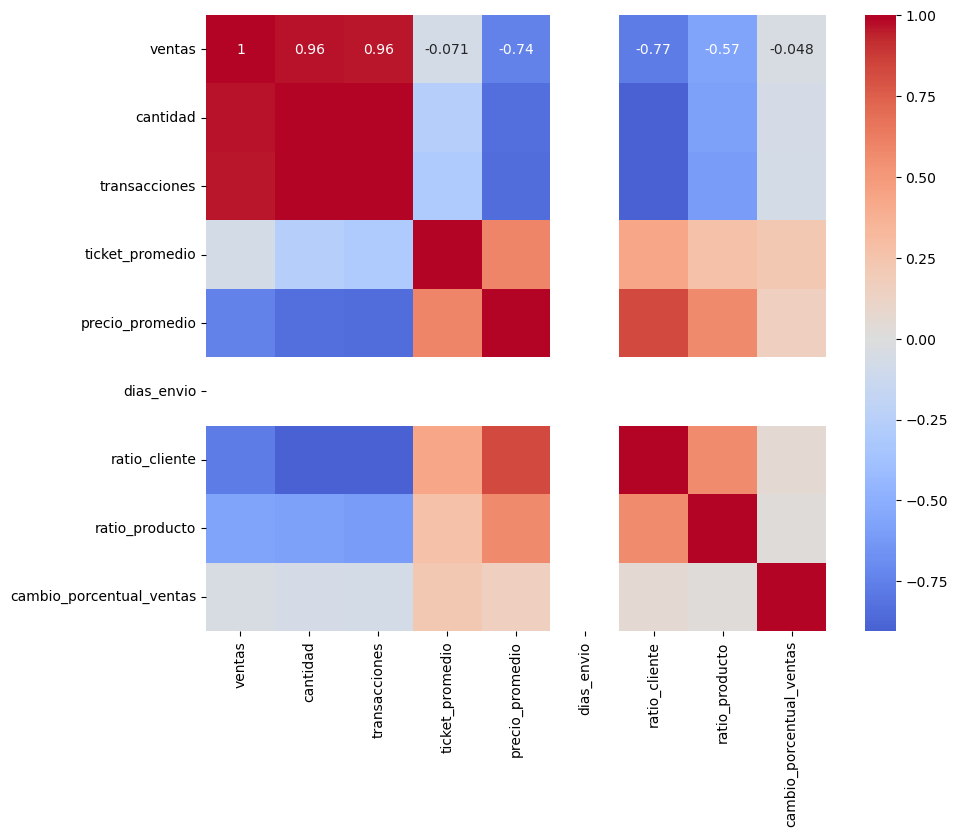

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', center=0)

# Mostrar el gráfico
plt.show()


### - Describa y explique la salida (la matriz de correlación) anterior

Ventas vs. Cantidad y Transacciones:


Ventas y Cantidad: Correlación muy alta y positiva (0.96). Esto indica que a medida que aumenta la cantidad de productos vendidos, también aumentan las ventas. Esta es una relación esperada, ya que más productos vendidos generalmente significan mayores ingresos.

Ventas y Transacciones: Correlación muy alta y positiva (0.96). Esto sugiere que un mayor número de transacciones está fuertemente asociado con mayores ventas, lo cual es lógico porque más transacciones deberían generar más ventas.

Ventas vs. Ticket Promedio y Precio Promedio:

Ventas y Ticket Promedio: Correlación negativa (-0.071), indicando una ligera relación inversa. Esto podría sugerir que un aumento en el ticket promedio no necesariamente se traduce en mayores ventas en este conjunto de datos específico.

Ventas y Precio Promedio: Correlación negativa (-0.74). Esto sugiere que a medida que aumenta el precio promedio de los productos, las ventas tienden a disminuir, posiblemente porque los consumidores compran menos cuando los precios son más altos.

Ventas vs. Días de Envío:

Ventas y Días de Envío: Correlación negativa (-0.77). Indica que a medida que el tiempo de envío aumenta, las ventas tienden a disminuir. Esto puede ser porque los clientes prefieren entregas rápidas y pueden desanimarse a comprar si los tiempos de envío son largos.

Ventas vs. Ratio Cliente y Ratio Producto:

Ventas y Ratio Cliente: Correlación negativa (-0.57). Esto sugiere que un mayor ratio de clientes únicos por transacción está asociado con menores ventas totales.

Ventas y Ratio Producto: Correlación muy baja (-0.048), casi nula. Indica que el ratio de productos por cantidad no tiene una relación lineal significativa con las ventas.

Ventas vs. Cambio Porcentual de Ventas:

Ventas y Cambio Porcentual de Ventas: Correlación muy baja (-0.048), casi nula. Indica que el cambio porcentual mes a mes en las ventas no tiene una relación lineal significativa con las ventas actuales.

### Selección de las variables más correlacionadas con las ventas

In [24]:
# Calcular la matriz de correlación
matriz_correlacion = df_numericas.corr()

# Seleccionar las variables más correlacionadas con las ventas (en valor absoluto)
correlaciones_ventas = matriz_correlacion['ventas'].abs().sort_values(ascending=False)

# Imprimir las variables más correlacionadas con las ventas
print(correlaciones_ventas)


ventas                      1.000000
cantidad                    0.964479
transacciones               0.959751
ratio_cliente               0.773407
precio_promedio             0.742519
ratio_producto              0.566340
ticket_promedio             0.070890
cambio_porcentual_ventas    0.047541
dias_envio                       NaN
Name: ventas, dtype: float64


### - Visualización gráfica de las variables correlacionadas

C:\Users\CursosTardes\AppData\Local\Temp\ipykernel_2796\4173384786.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_correlacionadas['ventas'] = df['ventas']
c:\Users\CursosTardes\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\CursosTardes\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\CursosTardes\anaconda3\Lib\site-packa

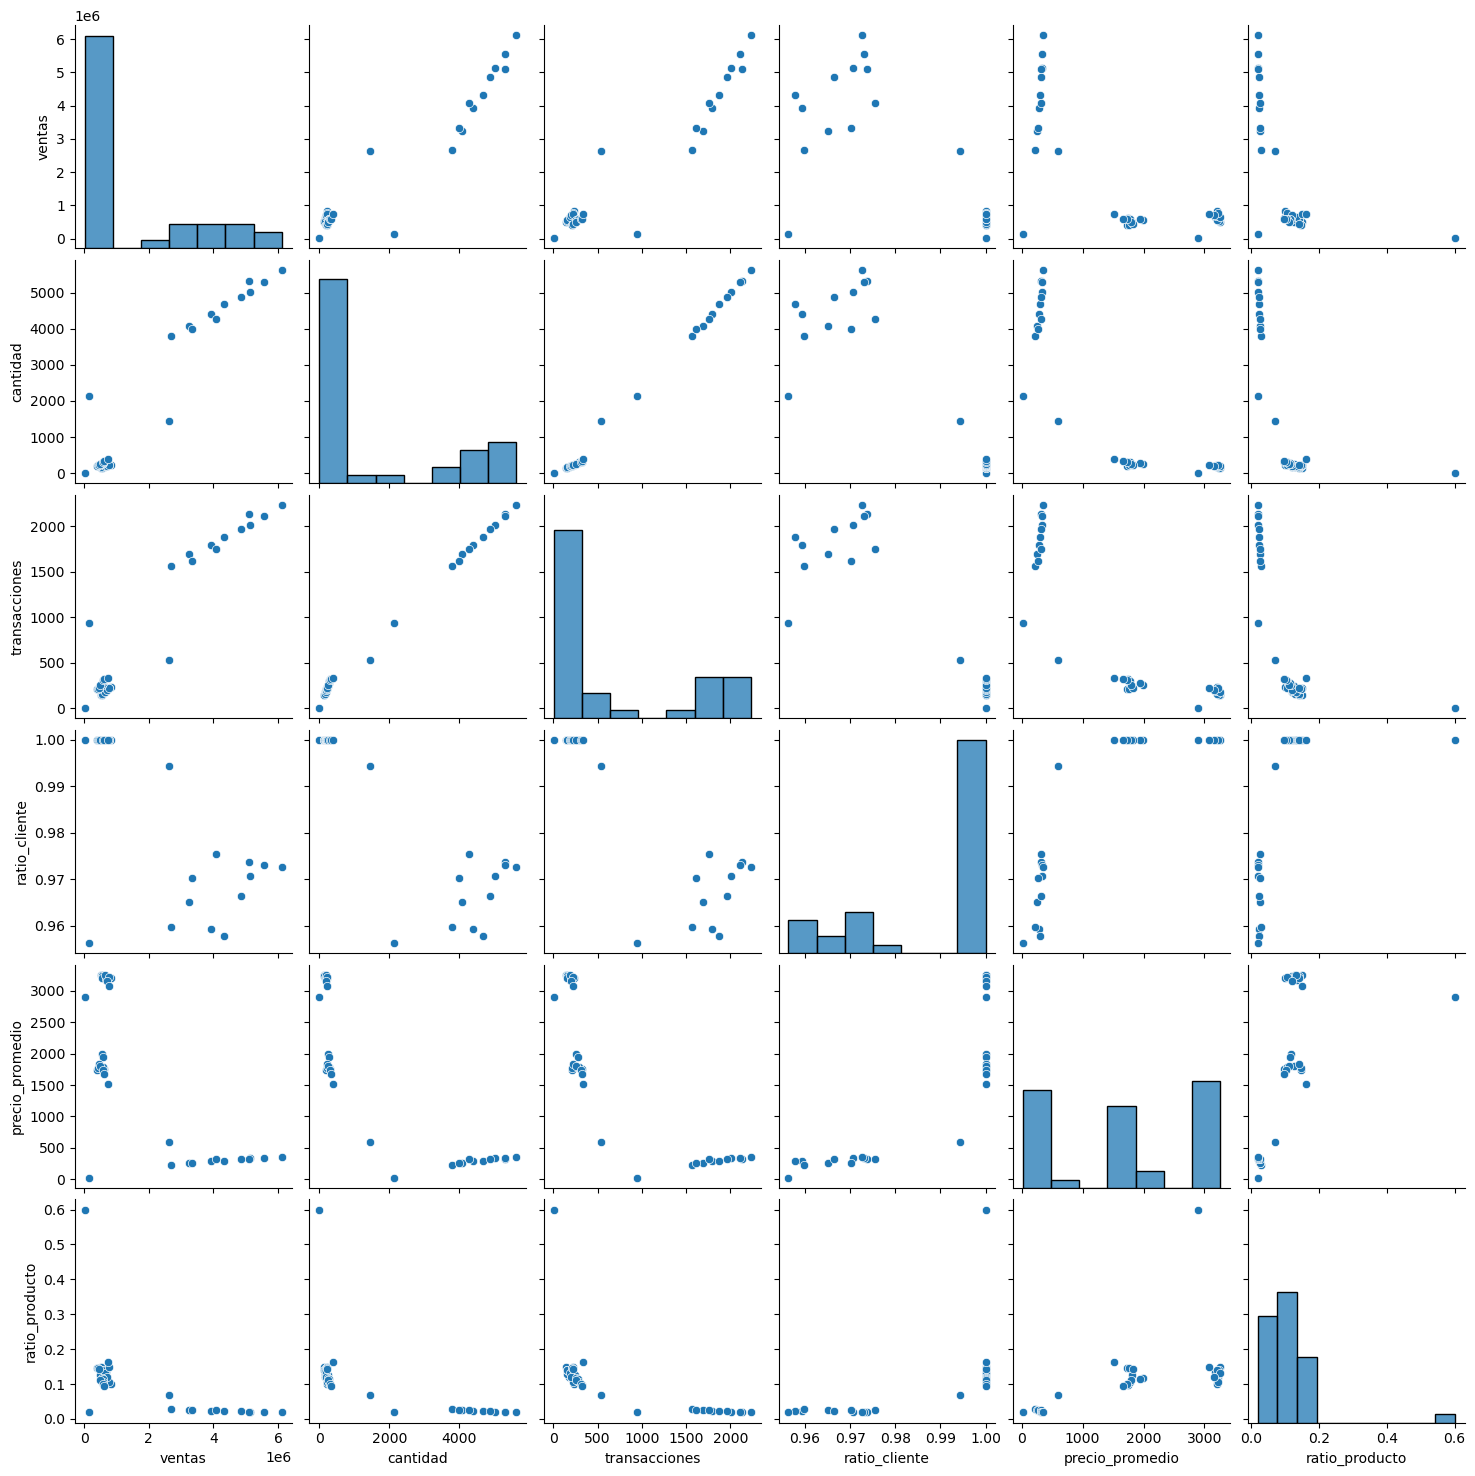

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar las variables más correlacionadas con las ventas
# (usamos un umbral de correlación de 0.5 para la demostración, puedes ajustar según tu necesidad)
umbral_correlacion = 0.5
variables_correlacionadas = correlaciones_ventas[correlaciones_ventas > umbral_correlacion].index

# Crear un DataFrame solo con las variables más correlacionadas con las ventas
df_correlacionadas = df[variables_correlacionadas]

# Añadir la columna de ventas
df_correlacionadas['ventas'] = df['ventas']

# Visualización gráfica usando pairplot
sns.pairplot(df_correlacionadas)
plt.show()


### - Interpretar el plot de arriba

Interpretación de los Gráficos

Los gráficos presentados son gráficos de dispersión (scatter plots) y histogramas que muestran la relación entre las variables numéricas más correlacionadas del DataFrame. Aquí hay una breve interpretación de los gráficos clave:

Ventas vs Cantidad y Transacciones:

Ventas vs Cantidad: Hay una relación lineal positiva fuerte, lo que indica que a medida que la cantidad de productos vendidos aumenta, las ventas también aumentan. Esto se alinea con las expectativas ya que más productos vendidos generalmente se traducen en mayores ingresos.
Ventas vs Transacciones: Similar a la relación con la cantidad, hay una fuerte relación lineal positiva. Más transacciones están asociadas con mayores ventas.
Ventas vs Ticket Promedio y Precio Promedio:

Ventas vs Ticket Promedio:

 No muestra una relación clara. Esto sugiere que el ticket promedio (ingreso por transacción) no tiene un impacto significativo directo en las ventas totales.
Ventas vs Precio Promedio: Hay una relación negativa moderada, lo que sugiere que a medida que el precio promedio de los productos aumenta, las ventas tienden a disminuir. Esto puede ser debido a que los clientes compran menos cuando los precios son más altos.
Ventas vs Días de Envío:

Ventas vs Días de Envío: No muestra una relación clara en los gráficos de dispersión, pero en general, los datos sugieren una posible tendencia negativa en la matriz de correlación. Los clientes pueden estar menos inclinados a comprar si los tiempos de envío son largos.

Ventas vs Ratio Cliente y Ratio Producto:

Ventas vs Ratio Cliente: 

Muestra poca variabilidad y no parece tener una relación clara con las ventas, aunque hay una ligera tendencia negativa en los datos.
Ventas vs Ratio Producto: No muestra una relación clara. Esto sugiere que el ratio de productos por cantidad no tiene una relación lineal significativa con las ventas.


Histograma de las Variables:

Los histogramas en la diagonal muestran la distribución de cada variable. Por ejemplo, las ventas tienen una distribución sesgada a la derecha, lo que indica que hay algunos valores de ventas muy altos en comparación con la mayoría de los datos.


Conclusiones Generales:

Cantidad y transacciones son las variables más fuertemente correlacionadas con las ventas, lo que es lógico y esperado.
Precio promedio muestra una correlación negativa con las ventas, sugiriendo que precios más altos pueden desalentar las compras.
Las otras variables no muestran una relación fuerte o clara con las ventas, lo que indica que pueden tener menos impacto directo o que el impacto está mediado por otros factores no considerados en este análisis.

### - Seleccionar las variables mas correlacionadas,  esta vez con monto_promedio

In [28]:
# Calcular la matriz de correlación
matriz_correlacion = df_numericas.corr()

# Seleccionar las variables más correlacionadas con ticket_promedio (en valor absoluto)
correlaciones_ticket_promedio = matriz_correlacion['ticket_promedio'].abs().sort_values(ascending=False)

# Imprimir las variables más correlacionadas con ticket_promedio
print(correlaciones_ticket_promedio)


ticket_promedio             1.000000
precio_promedio             0.592362
ratio_cliente               0.431960
transacciones               0.297581
ratio_producto              0.265832
cantidad                    0.262261
cambio_porcentual_ventas    0.225975
ventas                      0.070890
dias_envio                       NaN
Name: ticket_promedio, dtype: float64


### - Visualización gráfica de las variables correlacionadas con monto_promedio

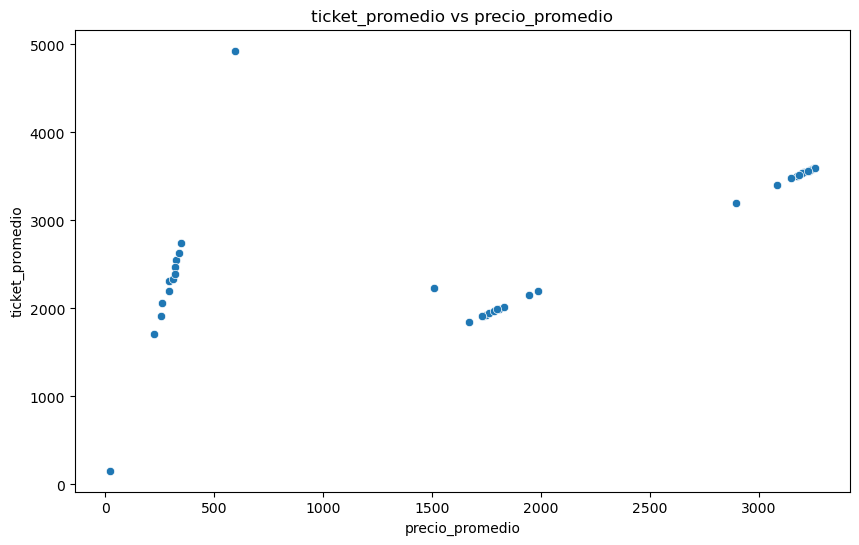

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar las variables más correlacionadas con ticket_promedio (excluyendo la propia columna 'ticket_promedio')
umbral_correlacion = 0.5
variables_correlacionadas_ticket = correlaciones_ticket_promedio[correlaciones_ticket_promedio > umbral_correlacion].index.drop('ticket_promedio')

# Crear gráficos de dispersión para cada variable correlacionada con ticket_promedio
for variable in variables_correlacionadas_ticket:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=variable, y='ticket_promedio')
    plt.title(f'ticket_promedio vs {variable}')
    plt.xlabel(variable)
    plt.ylabel('ticket_promedio')
    plt.show()


## Pruebas formales para determinar la influencia de cada variable en las ventas

Las pruebas formales se refieren a un conjunto de técnicas estadísticas y matemáticas que se utilizan para validar las hipótesis y afirmaciones hechas sobre los datos en un estudio o análisis.

Asimismo, las pruebas formales son una parte importante del análisis de datos ya que permiten tomar decisiones basadas en evidencia sólida en lugar de basarse únicamente en la intuición o el juicio subjetivo. 

Estas pruebas ayudan a los investigadores a determinar si los patrones o relaciones observados en los datos son estadísticamente significativos o simplemente el resultado del azar.

In [32]:
import pandas as pd
import statsmodels.api as sm

# Supongamos que ya tienes la matriz de correlación 'correlaciones_ventas' calculada previamente
# Seleccionar las variables independientes más correlacionadas con las ventas (excluyendo la columna 'ventas')
umbral_correlacion = 0.5
variables_correlacionadas = correlaciones_ventas[correlaciones_ventas > umbral_correlacion].index.drop('ventas')

# Crear un DataFrame solo con las variables más correlacionadas con las ventas
df_correlacionadas = df[variables_correlacionadas].copy()

# Añadir la columna de ventas al DataFrame
df_correlacionadas['ventas'] = df['ventas']

# Variables independientes (X) y la variable dependiente (y)
X = df_correlacionadas.drop(columns=['ventas'])
y = df_correlacionadas['ventas']

# Añadir una constante a las variables independientes
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal múltiple
modelo = sm.OLS(y, X).fit()

# Resumen del modelo
print(modelo.summary())



                            OLS Regression Results                            
Dep. Variable:                 ventas   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     560.2
Date:                Wed, 03 Jul 2024   Prob (F-statistic):           3.72e-30
Time:                        18:12:32   Log-Likelihood:                -516.61
No. Observations:                  38   AIC:                             1045.
Df Residuals:                      32   BIC:                             1055.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -6.004e+07   5.36e+06    -

### Impresión de los resultados

### - Explicar línea por línea el siguiente código:  

In [34]:
import pandas as pd
import numpy as np
from scipy import stats

# Supongamos que ya tienes el DataFrame 'df_numericas' con las columnas numéricas, incluyendo 'ventas'

# Limpiar los datos eliminando filas con NaNs o Infs
df_numericas_clean = df_numericas.replace([np.inf, -np.inf], np.nan).dropna()

# Lista para almacenar las variables influyentes y sus detalles
influencers = []

# Calcular la correlación y el p-value para cada variable con respecto a las ventas
for variable in df_numericas_clean.columns:
    if variable != "ventas":  # Excluir la columna 'ventas' de sí misma
        corr, p_value = stats.pearsonr(df_numericas_clean["ventas"], df_numericas_clean[variable])
        if p_value <= 0.05:
            influencers.append((variable, corr, "Significativo"))
        else:
            influencers.append((variable, corr, "No significativo"))

# Imprimir las variables influyentes
print("Variables influyentes en las ventas:")
for variable, corr, significance in influencers:
    print(f"Variable: {variable}, Correlación: {corr:.2f} ({significance})")


Variables influyentes en las ventas:
Variable: cantidad, Correlación: 0.96 (Significativo)
Variable: transacciones, Correlación: 0.96 (Significativo)
Variable: ticket_promedio, Correlación: -0.05 (No significativo)
Variable: precio_promedio, Correlación: -0.74 (Significativo)
Variable: dias_envio, Correlación: nan (No significativo)
Variable: ratio_cliente, Correlación: -0.77 (Significativo)
Variable: ratio_producto, Correlación: -0.57 (Significativo)
Variable: cambio_porcentual_ventas, Correlación: -0.05 (No significativo)


Se agregó una comprobación de la hipótesis nula antes de imprimir los resultados de la prueba de correlación. La hipótesis nula establece que no existe una correlación entre las variables, y se rechaza si el **valor p es menor que 0,05**. 

## Conclusiones

Variables Significativamente Correlacionadas:

Cantidad:
Correlación: 0.96 (Significativo)
Interpretación: Existe una fuerte correlación positiva entre la cantidad de productos vendidos y las ventas. Esto sugiere que a medida que se venden más productos, las ventas totales aumentan significativamente.
Transacciones:
Correlación: 0.96 (Significativo)
Interpretación: También hay una fuerte correlación positiva entre el número de transacciones y las ventas, indicando que un mayor número de transacciones está asociado con mayores ventas totales.
Precio Promedio:
Correlación: -0.74 (Significativo)
Interpretación: Hay una fuerte correlación negativa entre el precio promedio de los productos y las ventas. Esto sugiere que precios más altos pueden reducir las ventas totales.
Ratio Cliente:
Correlación: -0.77 (Significativo)
Interpretación: Existe una fuerte correlación negativa entre el ratio de clientes y las ventas. Esto podría indicar que un mayor número de clientes únicos por transacción no necesariamente contribuye a mayores ventas totales.
Ratio Producto:
Correlación: -0.57 (Significativo)
Interpretación: También hay una correlación negativa entre el ratio de productos y las ventas, aunque es menos fuerte que la correlación con el precio promedio o el ratio de clientes.
